In [1]:
import os
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
def concatenate_csv_files(folder_path):
    # List all CSV files in the folder
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    
    # If no CSV files found, exit
    if not csv_files:
        print("No CSV files found in the folder.")
        return
    
    # Initialize an empty DataFrame to store concatenated data
    concatenated_df = pd.DataFrame()

    # Concatenate all CSV files
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        df = pd.read_csv(file_path)
        df = df.drop_duplicates(subset=['shot_time', 'COUNTER_ID', 'cycle_time'])
        concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)
    
    return concatenated_df

### EXP - 1

### Create Ground Truth

In [28]:
ground_truth_normal_distribution = concatenate_csv_files('Labelled_Data')
ground_truth_normal_distribution = ground_truth_normal_distribution[['shot_time', 'COUNTER_ID', 'cycle_time', 'value2']]
ground_truth_normal_distribution.rename(columns={'value2': 'ground_truth'}, inplace=True)
ground_truth_normal_distribution['ground_truth'] = ground_truth_normal_distribution['ground_truth'].apply(lambda x: 0 if x == 2 else 1)
ground_truth_normal_distribution['ground_truth'] = 1 - ground_truth_normal_distribution['ground_truth'] # Inverting it for clarity 1 means anomoly and 0 means normal (1 is positive class and 0 is negatie class)
ground_truth_normal_distribution = ground_truth_normal_distribution.drop_duplicates(subset=['shot_time', 'COUNTER_ID', 'cycle_time'])
ground_truth_normal_distribution

,shot_time,COUNTER_ID,cycle_time,ground_truth
0,3/21/2024 14:39,EMA2233M10017,57,0
1,3/21/2024 14:40,EMA2233M10017,57,0
2,3/21/2024 14:41,EMA2233M10017,57,0
3,3/21/2024 14:42,EMA2233M10017,57,0
4,3/21/2024 14:43,EMA2233M10017,57,0
...,...,...,...,...
20971,3/21/2024 13:19,EMA2303M10302,32,0
20972,3/21/2024 13:19,EMA2303M10302,31,0
20973,3/21/2024 13:20,EMA2303M10302,32,0
20974,3/21/2024 13:21,EMA2303M10302,32,0


### Rule Base Result Comparison With Ground Truth

In [10]:
# ground_truth = concatenate_csv_files('Labelled_Data')
# ground_truth = ground_truth[['shot_time', 'COUNTER_ID', 'cycle_time', 'value2']]
# ground_truth.rename(columns={'value2': 'ground_truth'}, inplace=True)
# ground_truth['ground_truth'] = ground_truth['ground_truth'].apply(lambda x: 0 if x == 2 else 1)
# ground_truth['ground_truth'] = 1 - ground_truth['ground_truth'] # Inverting it for clarity 1 means anomoly and 0 means normal (1 is positive class and 0 is negatie class)
# ground_truth = ground_truth.drop_duplicates(subset=['shot_time', 'COUNTER_ID', 'cycle_time'])
# ground_truth

,shot_time,COUNTER_ID,cycle_time,ground_truth
0,3/21/2024 14:39,EMA2233M10017,57,0
1,3/21/2024 14:40,EMA2233M10017,57,0
2,3/21/2024 14:41,EMA2233M10017,57,0
3,3/21/2024 14:42,EMA2233M10017,57,0
4,3/21/2024 14:43,EMA2233M10017,57,0
...,...,...,...,...
20971,3/21/2024 13:19,EMA2303M10302,32,0
20972,3/21/2024 13:19,EMA2303M10302,31,0
20973,3/21/2024 13:20,EMA2303M10302,32,0
20974,3/21/2024 13:21,EMA2303M10302,32,0


In [11]:
# rule_base = concatenate_csv_files('aist_result')
# rule_base = rule_base[['shot_time', 'COUNTER_ID', 'cycle_time', 'value2']]
# rule_base.rename(columns={'value2': 'aist_result'}, inplace=True)
# rule_base['aist_result'] = rule_base['aist_result'].apply(lambda x: 0 if x == 2 else 1)
# rule_base['aist_result'] = 1 - rule_base['aist_result']
# rule_base

,shot_time,COUNTER_ID,cycle_time,aist_result
0,2022-07-07 23:39:24,EMA2227A10005,20,0
1,2022-07-07 23:39:44,EMA2227A10005,20,0
2,2022-07-07 23:40:04,EMA2227A10005,20,0
3,2022-07-07 23:40:25,EMA2227A10005,20,0
4,2022-07-07 23:40:45,EMA2227A10005,20,0
...,...,...,...,...
792857,2023-11-27 13:48:19,EMA2324M10983,1,0
792858,2023-11-27 13:48:21,EMA2324M10983,8,1
792859,2023-11-27 13:48:29,EMA2324M10983,0,0
792860,2023-11-27 13:48:30,EMA2324M10983,9,1


In [ ]:
# rule_base = concatenate_csv_files('normal_data_labelled_aist')
# rule_base = rule_base[['shot_time', 'COUNTER_ID', 'cycle_time', 'value2']]
# rule_base.rename(columns={'value2': 'aist_result'}, inplace=True)
# rule_base['aist_result'] = rule_base['aist_result'].apply(lambda x: 0 if x == 2 else 1)
# rule_base['aist_result'] = 1 - rule_base['aist_result']
# # Apply conversion to the whole column
# rule_base['shot_time'] = rule_base['shot_time'].apply(lambda x: convert_shot_time(x))
# rule_base

In [12]:
combined_result = pd.merge(ground_truth_normal_distribution, rule_base, 
                     on=[
                         'shot_time', 
                         'COUNTER_ID', 
                         'cycle_time'
                         ], 
                     how='inner')
combined_result

,shot_time,COUNTER_ID,cycle_time,ground_truth,aist_result
0,3/21/2024 14:39,EMA2233M10017,57,0,0
1,3/21/2024 14:40,EMA2233M10017,57,0,0
2,3/21/2024 14:41,EMA2233M10017,57,0,0
3,3/21/2024 14:42,EMA2233M10017,57,0,0
4,3/21/2024 14:43,EMA2233M10017,57,0,0
...,...,...,...,...,...
8617,3/17/2024 4:39,EMA2233M10100,60,0,0
8618,3/17/2024 4:40,EMA2233M10100,60,0,0
8619,3/17/2024 4:41,EMA2233M10100,60,0,0
8620,3/17/2024 4:42,EMA2233M10100,60,0,0


### Comparison of Ground Truth vs Rule Based

True Positive:  142
False Positive:  0
True Negative:  8474
False Negative:  6


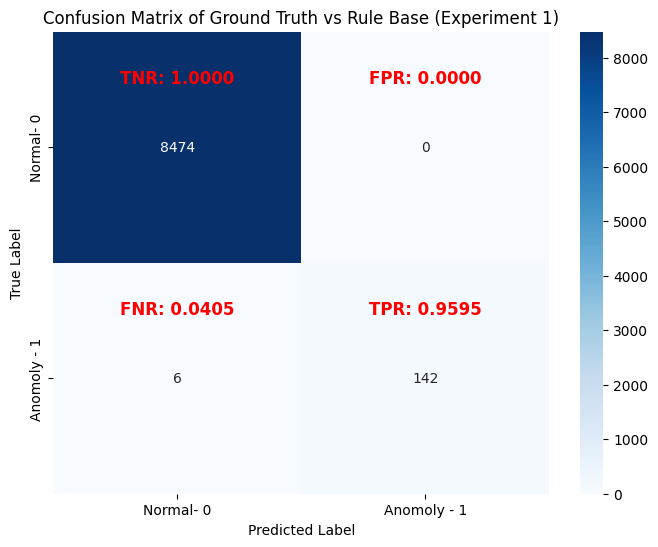

In [19]:
def plot_confusion_matrix(ground_truth=None, predictions=None, data_type=None):
        cm = confusion_matrix(ground_truth, predictions)

        # Calculate rates
        TN, FP, FN, TP = cm.ravel()
        # TP, FN, FP, TN = cm.ravel()
        print('True Positive: ', TP)
        print('False Positive: ', FP)
        print('True Negative: ', TN)
        print('False Negative: ', FN)
        TPR = TP / (TP + FN)
        TNR = TN / (TN + FP)
        FPR = FP / (FP + TN)
        FNR = FN / (FN + TP)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm,
                    annot=True,
                    fmt='d',
                    cmap='Blues',
                    xticklabels=['Normal- 0', 'Anomoly - 1',  ],
                    yticklabels=['Normal- 0','Anomoly - 1' ]
                    )

        # Annotate with rates
        plt.text(0.5, 0.2, f'TNR: {TNR:.4f}', ha='center', va='center', color='red', fontsize=12, weight='bold')
        plt.text(1.5, 0.2, f'FPR: {FPR:.4f}', ha='center', va='center', color='red', fontsize=12, weight='bold')
        plt.text(0.5, 1.2, f'FNR: {FNR:.4f}', ha='center', va='center', color='red', fontsize=12, weight='bold')
        plt.text(1.5, 1.2, f'TPR: {TPR:.4f}', ha='center', va='center', color='red', fontsize=12, weight='bold')

        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix of {data_type}')
        # plt.savefig(os.path.join(experiment_parent_dir, f'{data_type}_confusion_matrix.png'))
        plt.show()
        # plt.close()
plot_confusion_matrix(combined_result['ground_truth'], combined_result['aist_result'], 'Ground Truth vs Rule Base (Experiment 1)')

### Isolation Forest Result Comparison With Ground Truth

In [ ]:
if_result = concatenate_csv_files('if_results_normal_default_parameters')
if_result

In [ ]:
combined_result = pd.merge(ground_truth_normal_distribution, if_result, 
                     on=[
                         'shot_time', 
                         'COUNTER_ID', 
                         'cycle_time'
                         ], 
                     how='inner')
combined_result

In [ ]:
plot_confusion_matrix(combined_result['ground_truth'], combined_result['output'],'Ground Truth vs Isolation Forest (Experiment 1)')

### EXP - 2

### Create Ground Truth

In [20]:
ground_truth = concatenate_csv_files('anomalous_data_labelled')
ground_truth = ground_truth.dropna(subset='cycle_time')
ground_truth = ground_truth[['shot_time', 'COUNTER_ID', 'cycle_time', 'GT_Anomaly']]
ground_truth.rename(columns={'GT_Anomaly': 'ground_truth'}, inplace=True)
# ground_truth['ground_truth'] = ground_truth['ground_truth'].astype(int)
ground_truth['ground_truth'] = ground_truth['ground_truth'].replace('`1', '1')
ground_truth['ground_truth'] = ground_truth['ground_truth'].astype(int)
ground_truth

,shot_time,COUNTER_ID,cycle_time,ground_truth
0,2022-02-21 13:19:08,EMA2233M10295,3.0,1
1,2022-02-21 13:19:11,EMA2233M10295,0.0,1
2,2022-02-21 13:19:12,EMA2233M10295,155.0,1
3,2022-02-21 13:21:46,EMA2233M10295,14.0,1
4,2022-02-21 13:22:00,EMA2233M10295,4.0,1
...,...,...,...,...
140218,2023-12-21 18:47:09,EMA2233M10308,59.0,0
140219,2023-12-21 18:48:08,EMA2233M10308,58.0,0
140220,2023-12-21 18:49:06,EMA2233M10308,196.0,1
140221,2024-01-25 07:50:47,EMA2233M10308,10.0,1


### Rule Base Result Comparison With Ground Truth

In [21]:
rule_base = concatenate_csv_files('anomalous_data_labelled_aist')
rule_base = rule_base[['shot_time', 'COUNTER_ID', 'cycle_time', 'value2']]
rule_base.rename(columns={'value2': 'aist_result'}, inplace=True)
rule_base['aist_result'] = rule_base['aist_result'].apply(lambda x: 0 if x == 2 else 1)
rule_base['aist_result'] = 1 - rule_base['aist_result']
rule_base

,shot_time,COUNTER_ID,cycle_time,aist_result
0,2022-02-21 13:19:08,EMA2233M10295,3,0
1,2022-02-21 13:19:11,EMA2233M10295,0,0
2,2022-02-21 13:19:12,EMA2233M10295,155,1
3,2022-02-21 13:21:46,EMA2233M10295,14,1
4,2022-02-21 13:22:00,EMA2233M10295,4,0
...,...,...,...,...
140218,2023-09-12 11:53:57,EMA2233M10308,65,0
140219,2023-09-12 11:55:02,EMA2233M10308,65,0
140220,2023-09-12 11:56:07,EMA2233M10308,65,0
140221,2024-01-25 07:50:47,EMA2233M10308,10,0


In [22]:
rule_base_result_anomalous_data = pd.merge(ground_truth, rule_base, 
                     on=['shot_time', 
                         'COUNTER_ID', 
                         'cycle_time'], 
                     how='inner')
rule_base_result_anomalous_data

,shot_time,COUNTER_ID,cycle_time,ground_truth,aist_result
0,2022-02-21 13:19:08,EMA2233M10295,3.0,1,0
1,2022-02-21 13:19:11,EMA2233M10295,0.0,1,0
2,2022-02-21 13:19:12,EMA2233M10295,155.0,1,1
3,2022-02-21 13:21:46,EMA2233M10295,14.0,1,1
4,2022-02-21 13:22:00,EMA2233M10295,4.0,1,0
...,...,...,...,...,...
140218,2023-12-21 18:47:09,EMA2233M10308,59.0,0,0
140219,2023-12-21 18:48:08,EMA2233M10308,58.0,0,0
140220,2023-12-21 18:49:06,EMA2233M10308,196.0,1,1
140221,2024-01-25 07:50:47,EMA2233M10308,10.0,1,0


### Comparison of Ground Truth vs Rule Based

True Positive:  2641
False Positive:  2705
True Negative:  134782
False Negative:  95


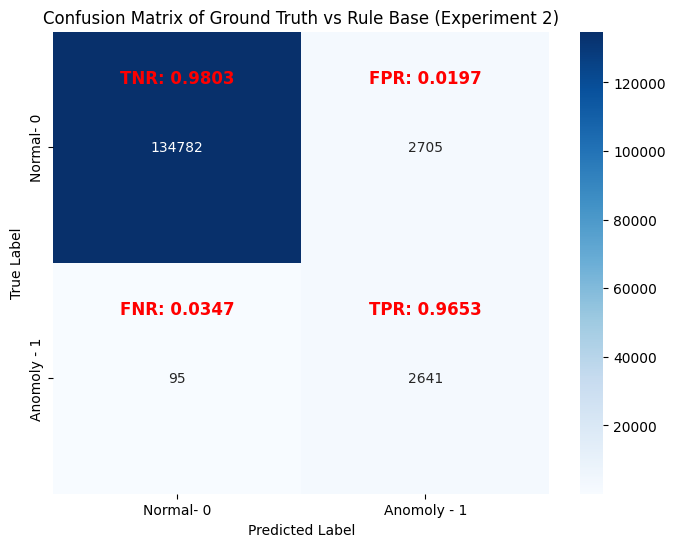

In [23]:
plot_confusion_matrix(rule_base_result_anomalous_data['ground_truth'], rule_base_result_anomalous_data['aist_result'],'Ground Truth vs Rule Base (Experiment 2)')

### Isolation Forest Result Comparison With Ground Truth

In [24]:
if_result = concatenate_csv_files('if_results_anomalous_default_parameters')
if_result

,shot_time,COUNTER_ID,cycle_time,anomoly_score,anomoly_score_inverse,output
0,2022-02-21 13:19:08,EMA2233M10295,3,-0.230311,0.269689,1
1,2022-02-21 13:19:11,EMA2233M10295,0,-0.230311,0.269689,1
2,2022-02-21 13:19:12,EMA2233M10295,155,-0.299788,0.200212,1
3,2022-02-21 13:21:46,EMA2233M10295,14,-0.226861,0.273139,1
4,2022-02-21 13:22:00,EMA2233M10295,4,-0.230311,0.269689,1
...,...,...,...,...,...,...
140218,2023-12-21 18:47:09,EMA2233M10308,59,0.086530,0.586530,0
140219,2023-12-21 18:48:08,EMA2233M10308,58,0.131517,0.631517,0
140220,2023-12-21 18:49:06,EMA2233M10308,196,-0.296655,0.203345,1
140221,2024-01-25 07:50:47,EMA2233M10308,10,-0.207651,0.292349,1


In [25]:
combined_result = pd.merge(ground_truth, if_result, 
                     on=[
                         'shot_time', 
                         'COUNTER_ID', 
                         'cycle_time'
                         ], 
                     how='inner')
combined_result

,shot_time,COUNTER_ID,cycle_time,ground_truth,anomoly_score,anomoly_score_inverse,output
0,2022-02-21 13:19:08,EMA2233M10295,3.0,1,-0.230311,0.269689,1
1,2022-02-21 13:19:11,EMA2233M10295,0.0,1,-0.230311,0.269689,1
2,2022-02-21 13:19:12,EMA2233M10295,155.0,1,-0.299788,0.200212,1
3,2022-02-21 13:21:46,EMA2233M10295,14.0,1,-0.226861,0.273139,1
4,2022-02-21 13:22:00,EMA2233M10295,4.0,1,-0.230311,0.269689,1
...,...,...,...,...,...,...,...
140218,2023-12-21 18:47:09,EMA2233M10308,59.0,0,0.086530,0.586530,0
140219,2023-12-21 18:48:08,EMA2233M10308,58.0,0,0.131517,0.631517,0
140220,2023-12-21 18:49:06,EMA2233M10308,196.0,1,-0.296655,0.203345,1
140221,2024-01-25 07:50:47,EMA2233M10308,10.0,1,-0.207651,0.292349,1


True Positive:  2723
False Positive:  9082
True Negative:  128405
False Negative:  13


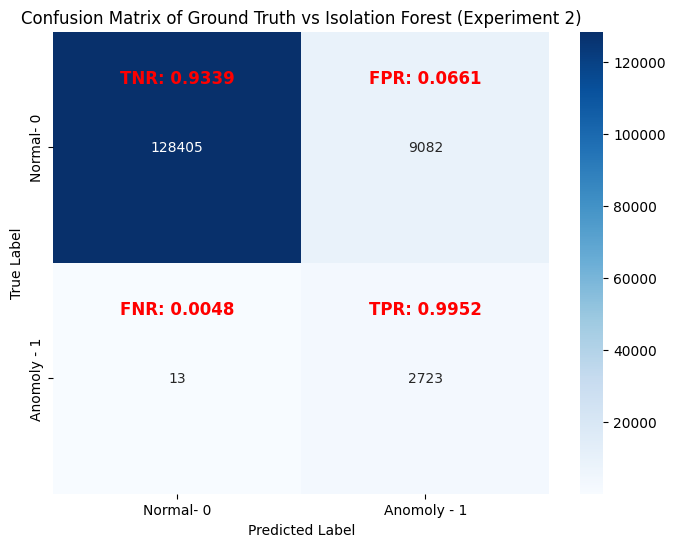

In [26]:
plot_confusion_matrix(ground_truth['ground_truth'], combined_result['output'],'Ground Truth vs Isolation Forest (Experiment 2)')

### EXP - 3

In [ ]:
plot_confusion_matrix(rule_base_result_normal_data['ground_truth'], rule_base_result_normal_data['aist_result'],'Ground Truth vs Rule Base (Experiment 3)')

### Isolation Forest Result Comparison With Ground Truth

In [29]:
if_result = concatenate_csv_files('if_results_normal_tuned_parameters')
if_result

,shot_time,COUNTER_ID,cycle_time,anomoly_score,anomoly_score_inverse,output
0,3/21/2024 14:39,EMA2233M10017,57,0.136203,0.636203,0
1,3/21/2024 14:40,EMA2233M10017,57,0.136203,0.636203,0
2,3/21/2024 14:41,EMA2233M10017,57,0.136203,0.636203,0
3,3/21/2024 14:42,EMA2233M10017,57,0.136203,0.636203,0
4,3/21/2024 14:43,EMA2233M10017,57,0.136203,0.636203,0
...,...,...,...,...,...,...
20971,3/21/2024 13:19,EMA2303M10302,32,0.049536,0.549536,0
20972,3/21/2024 13:19,EMA2303M10302,31,0.055678,0.555678,0
20973,3/21/2024 13:20,EMA2303M10302,32,0.049536,0.549536,0
20974,3/21/2024 13:21,EMA2303M10302,32,0.049536,0.549536,0


In [30]:
combined_result = pd.merge(ground_truth_normal_distribution, if_result, 
                     on=[
                         'shot_time', 
                         'COUNTER_ID', 
                         'cycle_time'
                         ], 
                     how='inner')
combined_result

,shot_time,COUNTER_ID,cycle_time,ground_truth,anomoly_score,anomoly_score_inverse,output
0,3/21/2024 14:39,EMA2233M10017,57,0,0.136203,0.636203,0
1,3/21/2024 14:40,EMA2233M10017,57,0,0.136203,0.636203,0
2,3/21/2024 14:41,EMA2233M10017,57,0,0.136203,0.636203,0
3,3/21/2024 14:42,EMA2233M10017,57,0,0.136203,0.636203,0
4,3/21/2024 14:43,EMA2233M10017,57,0,0.136203,0.636203,0
...,...,...,...,...,...,...,...
20971,3/21/2024 13:19,EMA2303M10302,32,0,0.049536,0.549536,0
20972,3/21/2024 13:19,EMA2303M10302,31,0,0.055678,0.555678,0
20973,3/21/2024 13:20,EMA2303M10302,32,0,0.049536,0.549536,0
20974,3/21/2024 13:21,EMA2303M10302,32,0,0.049536,0.549536,0


True Positive:  193
False Positive:  399
True Negative:  20378
False Negative:  6


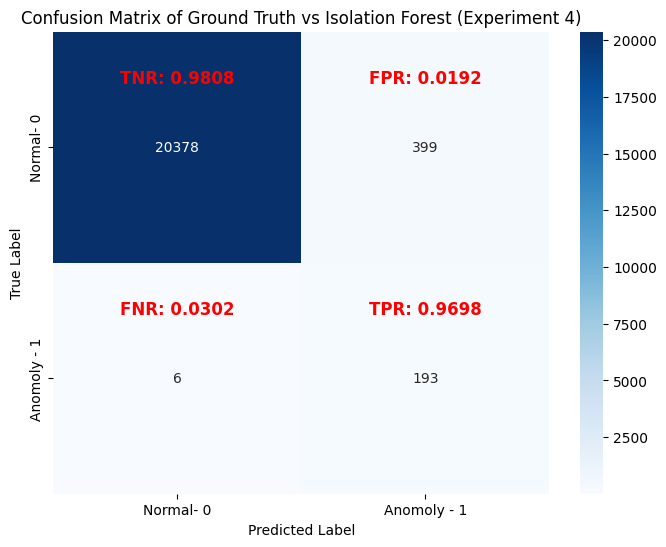

In [32]:
plot_confusion_matrix(combined_result['ground_truth'], combined_result['output'],'Ground Truth vs Isolation Forest (Experiment 4)')

### Experiment 5 Combined Result of Normal and Anomalous Data

In [33]:
data = pd.read_csv('combined_labelled_data/combined_result.csv')
data = data.dropna(subset='cycle_time')
data = data.drop_duplicates()
data

,shot_time,COUNTER_ID,cycle_time,ground_truth,anomoly_score,anomoly_score_inverse,output
0,3/21/2024 14:39,EMA2233M10017,57.0,0,0.024999,0.577898,0
1,3/21/2024 14:40,EMA2233M10017,57.0,0,0.024999,0.577898,0
2,3/21/2024 14:41,EMA2233M10017,57.0,0,0.024999,0.577898,0
3,3/21/2024 14:42,EMA2233M10017,57.0,0,0.024999,0.577898,0
4,3/21/2024 14:43,EMA2233M10017,57.0,0,0.024999,0.577898,0
...,...,...,...,...,...,...,...
162742,2023-12-21 18:47:09,EMA2233M10308,59.0,0,0.050833,0.603731,0
162743,2023-12-21 18:48:08,EMA2233M10308,58.0,0,0.034822,0.587721,0
162744,2023-12-21 18:49:06,EMA2233M10308,196.0,1,-0.192059,0.360840,1
162745,2024-01-25 07:50:47,EMA2233M10308,10.0,1,-0.264246,0.288652,1


In [ ]:
plot_confusion_matrix(data['ground_truth'], data['output'],'Ground Truth vs Isolation Forest (Experiment 5)')

In [ ]:
norma_data = concatenate_csv_files('aist_result')
norma_data = norma_data[['shot_time', 'COUNTER_ID', 'cycle_time', 'value2']]
norma_data.rename(columns={'value2': 'aist_result'}, inplace=True)
norma_data['aist_result'] = norma_data['aist_result'].apply(lambda x: 0 if x == 2 else 1)
norma_data['aist_result'] = 1 - norma_data['aist_result']
norma_data

In [ ]:
rule_base = concatenate_csv_files('aist_resut_ver2_electrolux')
rule_base = rule_base[['shot_time', 'COUNTER_ID', 'cycle_time', 'value2']]
rule_base.rename(columns={'value2': 'aist_result'}, inplace=True)
rule_base['aist_result'] = rule_base['aist_result'].apply(lambda x: 0 if x == 2 else 1)
rule_base['aist_result'] = 1 - rule_base['aist_result']
rule_base

In [ ]:
combined_data = pd.concat([combined_result, combined_result_anom], ignore_index=True)

In [ ]:
combined_data

In [ ]:
combined_result = pd.merge(data, combined_data, 
                     on=[
                         'shot_time', 
                         'COUNTER_ID', 
                         'cycle_time'
                         ], 
                     how='inner')
combined_result

In [ ]:
plot_confusion_matrix(data['ground_truth'], data['output'],'Ground Truth vs Isolation Forest (Experiment 5)')